In [1]:
# Imports
import requests
from PIL import Image
import io
from matplotlib import pyplot as plt

from diffusers import StableDiffusionUpscalePipeline
import torch


2024-05-16 12:38:00.593990: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, revision="fp16", torch_dtype=torch.float16
)
#pipeline = pipeline.to("cuda")

/home/nikhiljoshi/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/nikhiljoshi/.local/lib/python3.10/site-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-x4-upscaler via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/home/nikhiljoshi/.local/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_upscale.py:136: FutureWarning: The configuration file of the vae does not contain `scaling_factor` or it is set to 0.18215, which seems highly unlikely. If your checkpoint is a fine-tuned version of `stabilityai/stable-diffusion-x4-upscaler` you should change 'scaling_factor' to 0.08333 Please make sure to update the config accordingly, as not doing so might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull Request for the `vae/config.json` file
  deprecate("wrong scaling_factor", "1.0.0", deprecation_message, standard_warn=False)


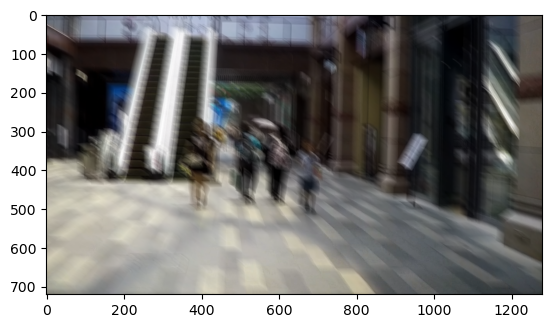

In [3]:
url = "https://github.com/sayakpaul/maxim-tf/raw/main/images/Deblurring/input/1fromGOPR0950.png"
low_res_img = Image.open(requests.get(url, stream=True).raw)
plt.imshow(low_res_img)


In [4]:
prompt = "escalators"

upscaled_img = pipeline(prompt=prompt, image=low_res_img).images[0]
plt.imshow(upscaled_img)

KeyboardInterrupt: 